#### Comparison of different missing data imputation methods
    * The imputation methods to compare are 
        1. mean imputation,
        2. Last Value Carried Forward (LVCF) Imputation, and
        3. Iterative imputation
        
    * Dataset to be used to compare missing data imputation method is Iris data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].astype(int)

#### Introducing missing values to sepal length feature

In [3]:
# Introduce missing values only in 'sepal length (cm)'
np.random.seed(42)
# Mask 20% of the data
missing_mask = np.random.choice([True, False], size=iris_df.shape[0], p=[0.2, 0.8])
iris_missing = iris_df.copy()
# Introduce 20% missing data in "sepal length" feature variable.
iris_missing.loc[missing_mask, 'sepal length (cm)'] = np.nan

In [4]:
# Function to visualize correlation heatmap
def plot_correlation_heatmap(title, data):
    corr_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(title)
    plt.show()

#### Correlation analysis

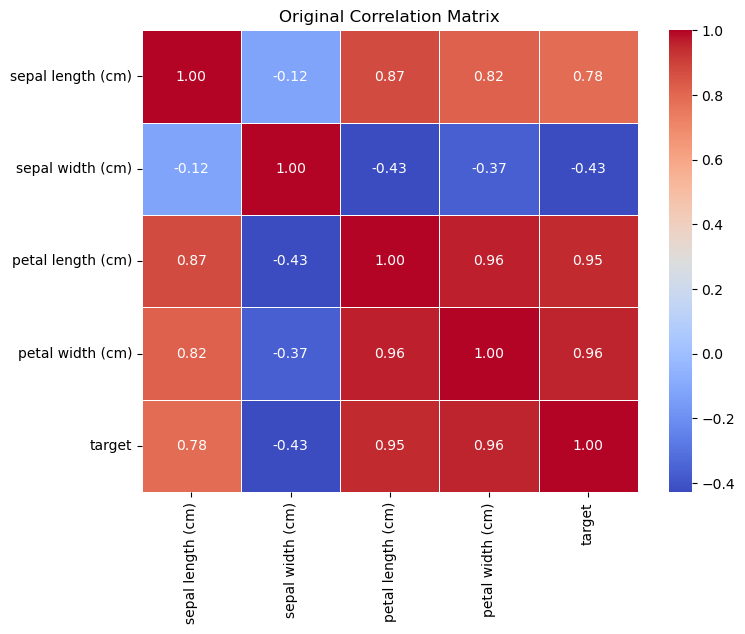

In [5]:
# Original Correlation Analysis
plot_correlation_heatmap('Original Correlation Matrix', iris_df)

* According to correlation matrix, the sepal length feature has very strong positive correlation with petal length and petal width features. However, sepal length feature has weak negative correlation with sepal width feature.
* Therefore, it is necessary to consider relationship between features to estimate missing values

In [6]:
# Function to calculate RMSE
def calculate_rmse(true_values, imputed_values):
    return sqrt(mean_squared_error(true_values, imputed_values))

In [7]:
# Function to create scatter plot with different markers for imputed values
def plot_scatter(title, true_values, imputed_values, missing_mask):
    plt.scatter(true_values, true_values, color='blue', marker='o', label='True Values')
    
    # Use 'x' marker only for imputed values corresponding to the 20% missing values
    imputed_marker = 'x' if sum(missing_mask) > 0 else 'o'
    plt.scatter(true_values[missing_mask], imputed_values[missing_mask], color='red', marker=imputed_marker, label='Imputed Values')
    
    plt.xlabel('True Values')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

##### Mean Imputation
* Impute missing value with mean value.

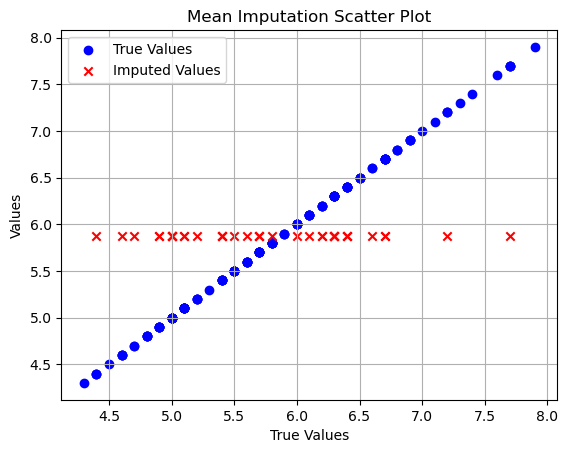

In [8]:
# Mean Imputation
mean_imputed_iris = iris_missing.copy()
mean_imputed_iris.fillna(mean_imputed_iris.mean(), inplace=True)
rmse_mean = calculate_rmse(iris_df['sepal length (cm)'], mean_imputed_iris['sepal length (cm)'])
plot_scatter('Mean Imputation Scatter Plot', iris_df['sepal length (cm)'], mean_imputed_iris['sepal length (cm)'], missing_mask)

* In above figure, the average distance between the estimated values by using mean imputation and the actual values is very large. Hence, the root mean square error (RMSE) is very large.

#### Last Value Carried Forward (LVCF) Imputation
* Impute missing value by using last observed value. 

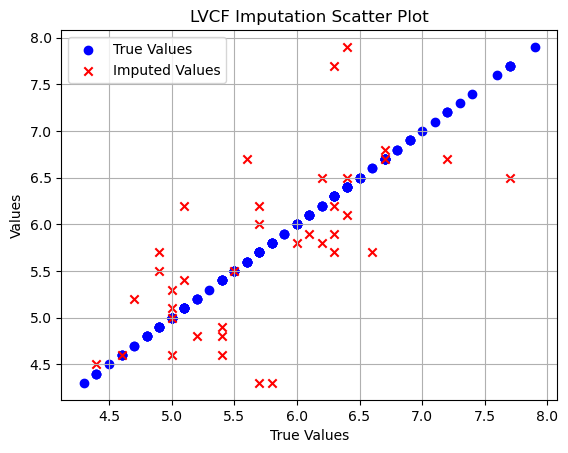

In [9]:
# Last Value Carried Forward (LVCF) Imputation
lvcf_imputed_iris = iris_missing.copy()
lvcf_imputed_iris.fillna(method='ffill', inplace=True)
rmse_lvcf = calculate_rmse(iris_df['sepal length (cm)'], lvcf_imputed_iris['sepal length (cm)'])
plot_scatter('LVCF Imputation Scatter Plot', iris_df['sepal length (cm)'], lvcf_imputed_iris['sepal length (cm)'], missing_mask)

* In above figure, compare with the mean imputation method, the average distance between the estimated values by using LVCF imputation and the actual values is small. Hence, the root mean square error (RMSE) becomes reduced.

#### Iterative imputation method
* Model each feature with missing values as a function of other features in a round-robin fashion.

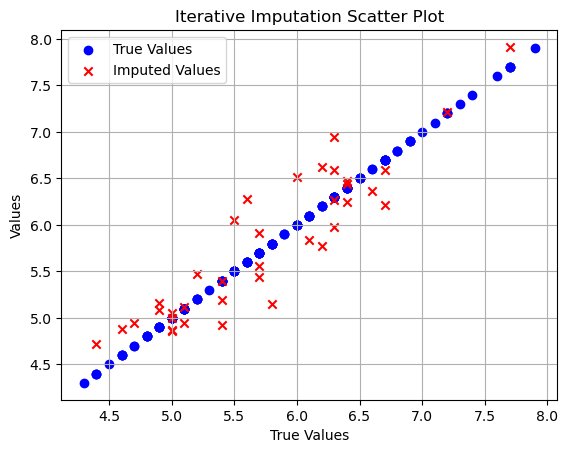

In [10]:
# Iterative Imputation using Sklearn
iterative_imputer = IterativeImputer(random_state=0)
iterative_imputed_iris = pd.DataFrame(iterative_imputer.fit_transform(iris_missing), columns=iris_missing.columns)
rmse_iterative = calculate_rmse(iris_df['sepal length (cm)'], iterative_imputed_iris['sepal length (cm)'])
plot_scatter('Iterative Imputation Scatter Plot', iris_df['sepal length (cm)'], iterative_imputed_iris['sepal length (cm)'], missing_mask)

* In above figure, compare with previous 2 imputation methods, the average distance between the estimated values by using iterative imputation and the actual values is the smallest. Hence, the root mean square error (RMSE) is smaller than previous imputation methods.

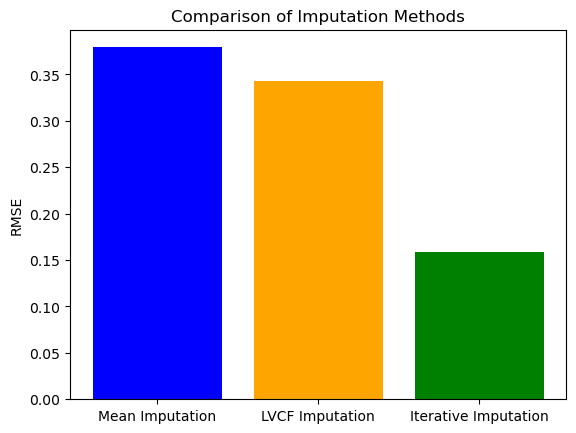

In [11]:
# Visualize the performances
methods = ['Mean Imputation', 'LVCF Imputation', 'Iterative Imputation']
rmse_values = [rmse_mean, rmse_lvcf, rmse_iterative]

plt.bar(methods, rmse_values, color=['blue', 'orange', 'green'])
plt.ylabel('RMSE')
plt.title('Comparison of Imputation Methods')
plt.show()

* In above bar-chart, root mean square error, RMSE, of mean imputation method is the largest among 3 imputation methods while RMSE value of the iterative imputation method is the smallest among 3 imputation methods.